# Atividades

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

In [1]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray

image = imread('dog.jpeg')
img = rgb2gray(image)
imsave('cinza.png', img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

In [2]:
image = imread('dog.jpeg')
img = rgb2gray(image)

for i in range(img.shape[0]):
    for j in range(img.shape[1]-1):
        if(img[i][j] == img[i][j+1]):
            img[i][j] = 0
            
imsave('img2questao.png', img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [3]:
def maiorMenor(img):
    maior = 0
    menor = 9999
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j] < menor):
                menor = img[i][j]
            if(img[i][j] > maior):
                maior = img[i][j]
    return maior,menor

image = imread('dog.jpeg')

red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

maior, menor = maiorMenor(red)
print("Red: " + str(maior) + "; " + str(menor))
maior, menor = maiorMenor(green)
print("Green: " + str(maior) + "; " + str(menor))
maior, menor = maiorMenor(blue)
print("Blue: " + str(maior) + "; " + str(menor))


Red: 255; 0
Green: 255; 0
Blue: 255; 0


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

In [7]:
import numpy as np

image = imread('dog.jpeg')

red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if(red[i][j] > 150):
            red[i][j] = 255
        if(green[i][j] > 150):
            green[i][j] = 255
        if(blue[i][j] > 150):
            blue[i][j] = 255
            
img = np.zeros((image.shape[0],image.shape[1],3),'uint8')
img[:,:,0] = red
img[:,:,1] = green
img[:,:,2] = blue
imsave('juntaCanais.png', img)

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’,‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

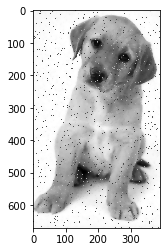

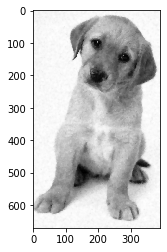

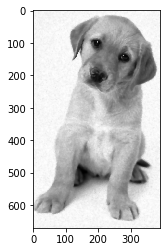

In [10]:
from skimage.util import random_noise
from skimage import restoration
import matplotlib.pyplot as plt

image = imread('dog.jpeg')
img = rgb2gray(image)

sp = random_noise(img, 's&p')
gaussian = random_noise(img, 'gaussian')
speckle = random_noise(img, 'speckle')

denoiseSp = restoration.denoise_tv_chambolle(sp)
denoiseGaussian = restoration.denoise_tv_chambolle(gaussian)
denoiseSpeckle = restoration.denoise_tv_chambolle(speckle)

plt.figure()
plt.imshow(denoiseSp,cmap = 'gray')
plt.figure()
plt.imshow(denoiseGaussian,cmap = 'gray')
plt.figure()
plt.imshow(denoiseSpeckle,cmap = 'gray')

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

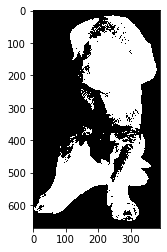

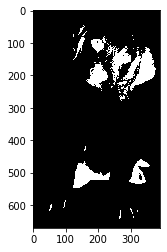

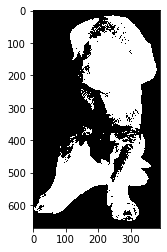

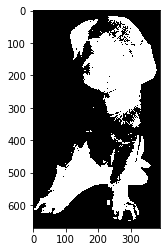

In [11]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_yen, threshold_isodata, threshold_li

def binThresholdOtsu(img):
    thresh = threshold_otsu(img)
    binary = img < thresh
    return binary
    
def binThresholdYen(img):
    thresh = threshold_yen(img)
    binary = img < thresh
    return binary
    
def binThresholdIsodata(img):
    thresh = threshold_isodata(img)
    binary = img < thresh
    return binary
    
def binThresholdLi(img):
    thresh = threshold_li(img)
    binary = img < thresh
    return binary

image = imread('dog.jpeg')
img = rgb2gray(image)

otsu = binThresholdOtsu(img)
yen = binThresholdYen(img)
isodata = binThresholdIsodata(img)
li = binThresholdLi(img)


plt.figure()
plt.imshow(otsu,cmap = 'gray')
plt.figure()
plt.imshow(yen,cmap = 'gray')
plt.figure()
plt.imshow(isodata,cmap = 'gray')
plt.figure()
plt.imshow(li,cmap = 'gray')

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

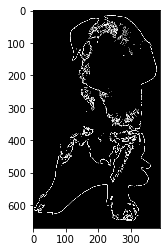

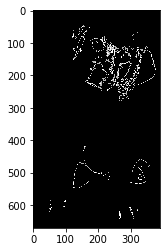

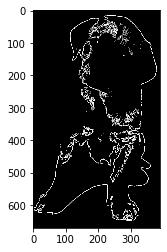

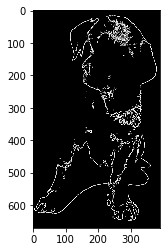

In [12]:
from skimage.filters import sobel,roberts,prewitt,scharr

bordaOtsu = sobel(otsu)
bordaYen = roberts(yen)
bordaIsoData = prewitt(isodata)
bordaLi = scharr(li)

plt.figure()
plt.imshow(bordaOtsu,cmap = 'gray')
plt.figure()
plt.imshow(bordaYen,cmap = 'gray')
plt.figure()
plt.imshow(bordaIsoData,cmap = 'gray')
plt.figure()
plt.imshow(bordaLi,cmap = 'gray')

8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior média de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

(670, 391)
167 97
[99, 198]
16 150


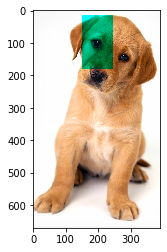

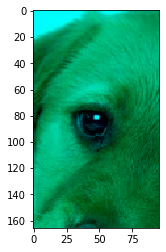

In [13]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

img = imread('dog.jpeg')
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

print(r.shape)

mediaR = r.max()
mediaG = g.max()
mediaB = b.max()
maior = -1

if(mediaR > mediaG) and (mediaR > mediaB):
    maior = r
elif(mediaG > mediaR) and (mediaG > mediaB):
    maior = g
elif(mediaB > mediaR) and (mediaB > mediaG):
    maior = b
else:
    maior = r #considerei que no caso dos canais terem a mesma média, o corte será feito no red
    
maiorDp = -1
posicoes = [-1, -1]

for i in range(1, (maior.shape[0])-1):
    for j in range(1, (maior.shape[1])-1):
        janela = []
        janela.append(maior[i][j])
        janela.append(maior[i-1][j-1])
        janela.append(maior[i-1][j])
        janela.append(maior[i-1][j+1])
        janela.append(maior[i][j-1])
        janela.append(maior[i][j+1])
        janela.append(maior[i+1][j-1])
        janela.append(maior[i+1][j])
        janela.append(maior[i+1][j+1])
        
        desvio = np.std(janela)
        if(desvio > maiorDp):
            maiorDp = desvio
            posicoes[0] = i
            posicoes[1] = j
            
tamLin = int(r.shape[0]/4)
tamCol = int(r.shape[1]/4)

corteX = int(tamLin/2)
corteY = int(tamCol/2)
l = posicoes[0] - corteX
c = posicoes[1] - corteY
print(tamLin, tamCol)
print(posicoes)
print(l, c)

if(posicoes[0]+corteX) > (maior.shape[0]):
    sobraX = posicoes[0]+corteX-maior.shape[0]
    posicoes[0] = posicoes[0] - sobraX
    l -= sobraX
    #corteX -= sobraX
    
if(posicoes[1]+corteY) > (maior.shape[1]):
    sobraY = posicoes[1]+corteY-maior.shape[1]
    posicoes[1] = posicoes[1] - sobraY
    c -= sobraY
    #corteY -= sobraY

cont1 = 0
cont2 = 0
for i in range(l, posicoes[0]+corteX):
    cont1 += 1
    for j in range(c, posicoes[1]+corteY):
        maior[i][j] = 0
        cont2 = j
        
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img[l:posicoes[0]+corteX,c:posicoes[1]+corteY,:])
        